In [1]:
s3cmd get --recursive s3://aretian-genomics/nanopore/

download: 's3://aretian-genomics/nanopore/bioliquid_chr17_pompe.bam' -> './bioliquid_chr17_pompe.bam'  [1 of 1]
 16246371 of 16246371   100% in    0s    37.17 MB/s  done


In [91]:
!samtools view bioliquid_chr17_pompe.bam | head -n 5000 > bioliquid_chr17_pompe_5000reads.txt

/bin/sh: 1: samtools: not found


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
#reads = pd.read_csv('bioliquid_chr17_pompe_100reads.csv')
reads = pd.read_csv('bioliquid_chr17_pompe_500reads.csv')

In [103]:
#reads['start_index'] = reads['unknown2']

In [104]:
test = reads[0:105]
test.head()

,ID,Unnamed: 1,chromosome,start_index,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,sequence,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,0d4fba3f-2877-4045-b19e-9b7d943f6469,16,chr17,22999284,1,15043S133M1D5M3D11M1I139M1D143M1D152M1I12M1I13...,*,0,0,TTTTGTGGAATCTGCAAGTGGATATGTGGACCTCTCCGAAGATGTC...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8801acf9-9940-4a19-9a17-434b294366ba,16,chr17,23015179,5,16S31M1D6M1D15M4I4M1D1M3D2M3D7M1I63M1D4M1D10M1...,*,0,0,TTTTGAAAACACTATTTGTAGAATCTGCAAGTGGATATTTGGGCCT...,...,ms:i:1742,AS:i:1742,nn:i:0,tp:A:P,cm:i:8,s1:i:81,s2:i:65,de:f:0.1072,rl:i:1008,NaN
2,b48eebff-290b-4735-b984-2e80c9ad9b1c,0,chr17,23101824,1,29S8M2D49M1D5M3I108M1D26M1I26M1D28M1D76M1D173M...,*,0,0,TTGTGTGGTTCTGGTTAGTTTCGTATTGCTTCCTTTTGAGAGAAGC...,...,ms:i:972,AS:i:972,nn:i:0,tp:A:P,cm:i:31,s1:i:260,s2:i:260,de:f:0.0342,rl:i:351,NaN
3,b8dd285a-f37c-4ddb-b23e-4ac637494fac,16,chr17,23012572,0,1364S30M1D19M2D6M1D46M1D12M1D31M2D124M1D80M1I2...,*,0,0,TTGTGATTTGAATGCATAATTTTGTGATAACCCGTTCCGTTTAATT...,...,ms:i:2758,AS:i:2758,nn:i:0,tp:A:P,cm:i:74,s1:i:692,s2:i:681,de:f:0.0516,"SA:Z:chr17,23150884,+,1913S1069M172D98S,7,329;",rl:i:1094
4,8764601d-7a10-4c6e-9199-d5a3c66711d6,16,chr17,23087602,3,3S25M1D76M1I98M1D15M1I69M5I12M1I5M1I49M1D49M1D...,*,0,0,TTGGGGAGGGCCTTAAGGTTTGTGGTGGAAAGGAAATATCTCCACA...,...,ms:i:2054,AS:i:2054,nn:i:0,tp:A:P,cm:i:55,s1:i:472,s2:i:469,de:f:0.0319,rl:i:691,NaN


In [105]:
for ID in test.index:
    print(f"{test.loc[ID,'start_index']}, {len(test.loc[ID,'sequence'])}")

22999284, 32759
23015179, 1385
23101824, 580
23012572, 3080
23087602, 1191
23014434, 1633
23061851, 3700
22975697, 32759
23052482, 1874
23047680, 1103
23013760, 3295
23015123, 6736
23008122, 1896
23075330, 6902
23073904, 19972
23033842, 32759
23006151, 26632
23071824, 32759
23015858, 1842
23111057, 2816
23065231, 6130
23015337, 1409
23015550, 3965
22983246, 19609
23060373, 14163
23085852, 5247
23004186, 2416
23030913, 32759
22936972, 32759
23024826, 1746
23006975, 11655
23015383, 2354
23015572, 4404
22984020, 22347
23054052, 18649
22990548, 32759
23068543, 2339
23064241, 8105
23073112, 32759
23116370, 32759
23078243, 685
23015495, 30901
23063159, 644
23011493, 5430
22997071, 13985
23111594, 21366
23014423, 5256
23045163, 21031
23079994, 5457
23029703, 899
23066090, 1904
23092675, 548
23010327, 29026
23054123, 4702
22990923, 32759
23081618, 30138
23049910, 1063
23116549, 372
23047401, 25797
23049378, 4542
23055024, 10205
23015681, 4476
23012918, 743
23046356, 2218
23053189, 1982
2308744

In [106]:
end_index = max(test['start_index']) + len(test.loc[test['start_index'].idxmax(),'sequence'])
start_index = min(test['start_index'])
index_range = end_index-start_index

In [107]:
read_overlap = np.zeros((len(test),index_range)) # empty matrix for reads

In [110]:
for ID in test.index:
    print(f"Adding raad cover for read {ID+1}: Index-->{test.loc[ID,'start_index']}, length-->{len(test.loc[ID,'sequence'])}")
    start = test.loc[ID,'start_index']-start_index
    #print(start)
    end = start+len(test.loc[ID,'sequence'])
    #print(end)
    read_overlap[ID,start:end] = 1

Adding raad cover for read 1: Index-->22999284, length-->32759
Adding raad cover for read 2: Index-->23015179, length-->1385
Adding raad cover for read 3: Index-->23101824, length-->580
Adding raad cover for read 4: Index-->23012572, length-->3080
Adding raad cover for read 5: Index-->23087602, length-->1191
Adding raad cover for read 6: Index-->23014434, length-->1633
Adding raad cover for read 7: Index-->23061851, length-->3700
Adding raad cover for read 8: Index-->22975697, length-->32759
Adding raad cover for read 9: Index-->23052482, length-->1874
Adding raad cover for read 10: Index-->23047680, length-->1103
Adding raad cover for read 11: Index-->23013760, length-->3295
Adding raad cover for read 12: Index-->23015123, length-->6736
Adding raad cover for read 13: Index-->23008122, length-->1896
Adding raad cover for read 14: Index-->23075330, length-->6902
Adding raad cover for read 15: Index-->23073904, length-->19972
Adding raad cover for read 16: Index-->23033842, length-->3275

In [111]:
summary = read_overlap.sum(axis=0)

In [112]:
df = pd.DataFrame(summary,index=range(start_index,end_index), columns=['overlap_count'])
df['position'] = df.index

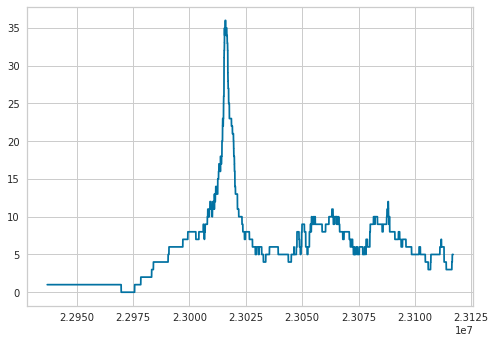

In [113]:
plt.plot(df['position'],df['overlap_count'])

In [116]:
index_range

179949

# Clustering

In [117]:
left_bound = 23000000

In [118]:
test.head(1)

,ID,Unnamed: 1,chromosome,start_index,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,sequence,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,0d4fba3f-2877-4045-b19e-9b7d943f6469,16,chr17,22999284,1,15043S133M1D5M3D11M1I139M1D143M1D152M1I12M1I13...,*,0,0,TTTTGTGGAATCTGCAAGTGGATATGTGGACCTCTCCGAAGATGTC...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
#sequences = {}
sequences = []

In [120]:
for ID in test.index:
    sequence = list(test.loc[ID,'sequence']) # turn sequence string into list
    
    start = test.loc[ID,'start_index']-left_bound
    
    if start > 0: # sequence starts to the right of the bound
        
        sequence = (start*['X'])+sequence
        sequence_trimmed = ''.join(sequence) # keep entire sequence
        
        
    elif start < 0: # sequence starts to the left of the bound
        sequence_trimmed = ''.join(sequence[np.abs(start):])
        
                                    
    #sequences[test.loc[ID,'ID']] = sequence_trimmed
    sequences.append(sequence_trimmed)
    

In [121]:
longest_sequence_length = len(max(sequences, key=len)) # get longest sequence
for i in range(len(sequences)):
    pad_length = longest_sequence_length - len(sequences[i])
    sequence = list(sequences[i])
    sequence = sequence+(pad_length*['X'])
    sequence = sequence[0:3000] # ADDED - RANGE from start index
    sequence = ''.join(sequence)
    sequences[i] = sequence

In [122]:
test['sequence_area_of_interest'] = sequences

/home/jkruguer/.conda/envs/genomics/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
test

,ID,Unnamed: 1,chromosome,start_index,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,sequence,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,sequence_area_of_interest
0,0d4fba3f-2877-4045-b19e-9b7d943f6469,16,chr17,22999284,1,15043S133M1D5M3D11M1I139M1D143M1D152M1I12M1I13...,*,0,0,TTTTGTGGAATCTGCAAGTGGATATGTGGACCTCTCCGAAGATGTC...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TGGACCGCTTTGAGGCCTATGGTAGTAAAGGATAGCTTCATATAAA...
1,8801acf9-9940-4a19-9a17-434b294366ba,16,chr17,23015179,5,16S31M1D6M1D15M4I4M1D1M3D2M3D7M1I63M1D4M1D10M1...,*,0,0,TTTTGAAAACACTATTTGTAGAATCTGCAAGTGGATATTTGGGCCT...,...,AS:i:1742,nn:i:0,tp:A:P,cm:i:8,s1:i:81,s2:i:65,de:f:0.1072,rl:i:1008,NaN,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
2,b48eebff-290b-4735-b984-2e80c9ad9b1c,0,chr17,23101824,1,29S8M2D49M1D5M3I108M1D26M1I26M1D28M1D76M1D173M...,*,0,0,TTGTGTGGTTCTGGTTAGTTTCGTATTGCTTCCTTTTGAGAGAAGC...,...,AS:i:972,nn:i:0,tp:A:P,cm:i:31,s1:i:260,s2:i:260,de:f:0.0342,rl:i:351,NaN,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
3,b8dd285a-f37c-4ddb-b23e-4ac637494fac,16,chr17,23012572,0,1364S30M1D19M2D6M1D46M1D12M1D31M2D124M1D80M1I2...,*,0,0,TTGTGATTTGAATGCATAATTTTGTGATAACCCGTTCCGTTTAATT...,...,AS:i:2758,nn:i:0,tp:A:P,cm:i:74,s1:i:692,s2:i:681,de:f:0.0516,"SA:Z:chr17,23150884,+,1913S1069M172D98S,7,329;",rl:i:1094,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
4,8764601d-7a10-4c6e-9199-d5a3c66711d6,16,chr17,23087602,3,3S25M1D76M1I98M1D15M1I69M5I12M1I5M1I49M1D49M1D...,*,0,0,TTGGGGAGGGCCTTAAGGTTTGTGGTGGAAAGGAAATATCTCCACA...,...,AS:i:2054,nn:i:0,tp:A:P,cm:i:55,s1:i:472,s2:i:469,de:f:0.0319,rl:i:691,NaN,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,ebdd1129-003a-4f8d-acb4-72f40f4bbec8,16,chr17,22978432,1,6925S15M1D2M1D9M1D52M2I4M1D10M5D76M1I4M2I70M1D...,*,0,0,AATGTATTGCTGAAACTCTCTCGTGATGATTGCATTCAACTCACAG...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GTCACATTGCTTTCCATAGAGTAGTTCTGAAATGTGCTTTGCAGTG...
101,9c52e02c-24f7-4ce5-8bd8-943008fda767,16,chr17,23107071,1,5205S15M1I63M1I8M4D171M1I178M1D101M1I19M2D28M2...,*,0,0,AATATTGTTAAGTGTGTTTTAAACTCTTTTTCATCAGCTTGCGTGT...,...,AS:i:9782,nn:i:0,tp:A:P,cm:i:234,s1:i:2179,s2:i:2204,de:f:0.0452,"SA:Z:chr17,22895323,+,5829S5178M603D33S,1,1537;",rl:i:4173,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
102,05a4f236-5d2f-4083-94cf-b80ac7aa8660,16,chr17,23013791,1,16M1D76M1I99M1D48M1D2M1D14M2D6M3I79M1I39M2I14M...,*,0,0,AAGAGCAGTGATGAAAACTCTTTTTCTAGAATCTGCAAGTGGACGT...,...,AS:i:6257,nn:i:0,tp:A:P,cm:i:5,s1:i:58,s2:i:66,de:f:0.1291,rl:i:4222,NaN,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
103,6b17167f-ef76-4fa7-a41b-26f4459d43fb,2048,chr17,23082261,1,29H40M1D108M1I166M2D44M2D17M1D34M2D2M1D21M1D29...,*,0,0,AACTCACAGAGCTGAACATTCCTTGCGATGTAGCAGTTTCAAACAC...,...,AS:i:7710,nn:i:0,tp:A:P,cm:i:5,s1:i:60,s2:i:57,de:f:0.101,"SA:Z:chr17,23498874,+,2969S46556M1085D1709S,1,...",rl:i:41007,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...


In [124]:
import numpy as np
NUCLEOTIDE_VOCABULARY = [
    'A','C','G','T','X'
]
        
def nucleotide_to_one_hot(nucleotide_sequence):
    to_return = []
    for char in nucleotide_sequence:
        if char in NUCLEOTIDE_VOCABULARY:
            to_append = np.zeros(len(NUCLEOTIDE_VOCABULARY))
            to_append[NUCLEOTIDE_VOCABULARY.index(char)] = 1.
            to_return.append(to_append)
        else:
            raise ValueError('Could not one-hot code character {}'.format(char))
    return np.array(to_return)

nucleotide_to_one_hot('GTCATACX') # example

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [125]:
sequences_test = []

In [126]:
for seq in sequences:
    sequences_test.append(list(seq))

In [111]:
test['sequence_one_hot'] = test.sequence_area_of_interest.apply(lambda x: nucleotide_to_one_hot(x).flatten())  # Map variants that have insertions or deletions to all zeros (483 of them).

/home/jkruguer/.conda/envs/genomics/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = enc.fit_transform(sequences_test).toarray()

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(X_pca)

[[ 5.88658724e+01  6.12668670e+00]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [ 5.89925146e+01 -7.80238941e+00]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [ 5.59189814e+01  2.96921569e+01]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1.42437184e-02]
 [-4.82545104e+00 -1

In [130]:
test['PCA1'] = np.nan
test['PCA2'] = np.nan
for ID in test.index:
    test.loc[ID,'PCA1'] = X_pca[ID][0].round(5)
    test.loc[ID,'PCA2'] = X_pca[ID][1].round(5)

/home/jkruguer/.conda/envs/genomics/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jkruguer/.conda/envs/genomics/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jkruguer/.conda/envs/genomics/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

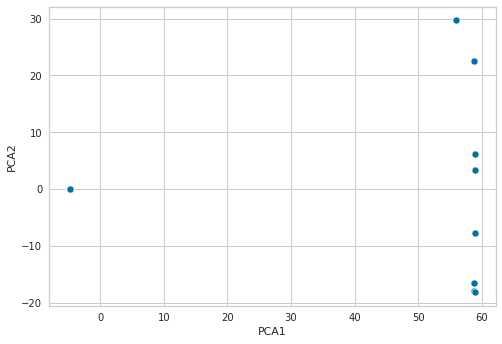

In [131]:
import seaborn as sns
sns.scatterplot(data=test,x='PCA1',y='PCA2')

Text(0, 0.5, 'Distortion')

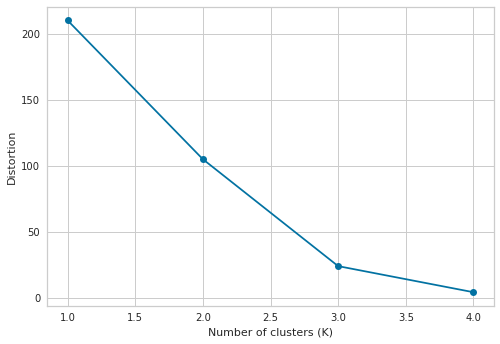

In [132]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Standardizing the features
X = test[['PCA1','PCA2']]
X = StandardScaler().fit_transform(X)

distortions = []

for k in range(1, 5):
    KMeans_model = KMeans(n_clusters=k, random_state=42)
    KMeans_model.fit(X)
    distortions.append(KMeans_model.inertia_)

plt.plot(range(1, 5), distortions,  marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')

In [133]:
silhouette_scores = []
for k in range(2, 5):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.931959460413601
Silhouette Score for k =  3 is 0.9655743551256758
Silhouette Score for k =  4 is 0.9781213103688307


Text(0, 0.5, 'Silhouette score')

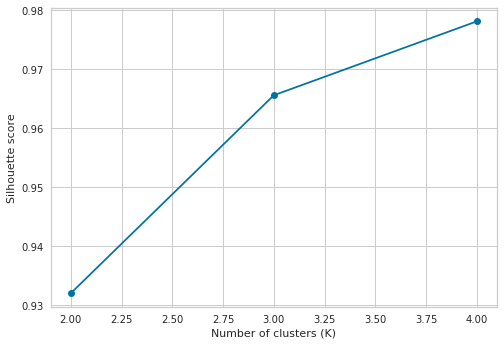

In [135]:
plt.plot(range(2, 5), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')

/home/jkruguer/.conda/envs/genomics/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/jkruguer/.conda/envs/genomics/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/home/jkruguer/.conda/envs/genomics/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=4), k=None)

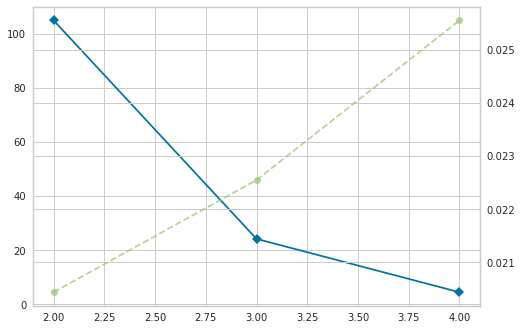

In [136]:
from yellowbrick.cluster import KElbowVisualizer

visualizer3 = KElbowVisualizer(KMeans(), k=(2,5))

visualizer3.fit(X) # Fit the data to the visualizer

In [137]:
model = KMeans(n_clusters=2, random_state=42)
cls2 = model.fit(X)
test['kmeans_cls2'] = cls2.labels_

/home/jkruguer/.conda/envs/genomics/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [138]:
test

,ID,Unnamed: 1,chromosome,start_index,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,sequence,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,sequence_area_of_interest,PCA1,PCA2,kmeans_cls2
0,0d4fba3f-2877-4045-b19e-9b7d943f6469,16,chr17,22999284,1,15043S133M1D5M3D11M1I139M1D143M1D152M1I12M1I13...,*,0,0,TTTTGTGGAATCTGCAAGTGGATATGTGGACCTCTCCGAAGATGTC...,...,NaN,NaN,NaN,NaN,NaN,NaN,TGGACCGCTTTGAGGCCTATGGTAGTAAAGGATAGCTTCATATAAA...,58.86587,6.12669,1
1,8801acf9-9940-4a19-9a17-434b294366ba,16,chr17,23015179,5,16S31M1D6M1D15M4I4M1D1M3D2M3D7M1I63M1D4M1D10M1...,*,0,0,TTTTGAAAACACTATTTGTAGAATCTGCAAGTGGATATTTGGGCCT...,...,cm:i:8,s1:i:81,s2:i:65,de:f:0.1072,rl:i:1008,NaN,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,-4.82545,-0.01424,0
2,b48eebff-290b-4735-b984-2e80c9ad9b1c,0,chr17,23101824,1,29S8M2D49M1D5M3I108M1D26M1I26M1D28M1D76M1D173M...,*,0,0,TTGTGTGGTTCTGGTTAGTTTCGTATTGCTTCCTTTTGAGAGAAGC...,...,cm:i:31,s1:i:260,s2:i:260,de:f:0.0342,rl:i:351,NaN,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,-4.82545,-0.01424,0
3,b8dd285a-f37c-4ddb-b23e-4ac637494fac,16,chr17,23012572,0,1364S30M1D19M2D6M1D46M1D12M1D31M2D124M1D80M1I2...,*,0,0,TTGTGATTTGAATGCATAATTTTGTGATAACCCGTTCCGTTTAATT...,...,cm:i:74,s1:i:692,s2:i:681,de:f:0.0516,"SA:Z:chr17,23150884,+,1913S1069M172D98S,7,329;",rl:i:1094,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,-4.82545,-0.01424,0
4,8764601d-7a10-4c6e-9199-d5a3c66711d6,16,chr17,23087602,3,3S25M1D76M1I98M1D15M1I69M5I12M1I5M1I49M1D49M1D...,*,0,0,TTGGGGAGGGCCTTAAGGTTTGTGGTGGAAAGGAAATATCTCCACA...,...,cm:i:55,s1:i:472,s2:i:469,de:f:0.0319,rl:i:691,NaN,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,-4.82545,-0.01424,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,ebdd1129-003a-4f8d-acb4-72f40f4bbec8,16,chr17,22978432,1,6925S15M1D2M1D9M1D52M2I4M1D10M5D76M1I4M2I70M1D...,*,0,0,AATGTATTGCTGAAACTCTCTCGTGATGATTGCATTCAACTCACAG...,...,NaN,NaN,NaN,NaN,NaN,NaN,GTCACATTGCTTTCCATAGAGTAGTTCTGAAATGTGCTTTGCAGTG...,58.90624,3.42259,1
101,9c52e02c-24f7-4ce5-8bd8-943008fda767,16,chr17,23107071,1,5205S15M1I63M1I8M4D171M1I178M1D101M1I19M2D28M2...,*,0,0,AATATTGTTAAGTGTGTTTTAAACTCTTTTTCATCAGCTTGCGTGT...,...,cm:i:234,s1:i:2179,s2:i:2204,de:f:0.0452,"SA:Z:chr17,22895323,+,5829S5178M603D33S,1,1537;",rl:i:4173,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,-4.82545,-0.01424,0
102,05a4f236-5d2f-4083-94cf-b80ac7aa8660,16,chr17,23013791,1,16M1D76M1I99M1D48M1D2M1D14M2D6M3I79M1I39M2I14M...,*,0,0,AAGAGCAGTGATGAAAACTCTTTTTCTAGAATCTGCAAGTGGACGT...,...,cm:i:5,s1:i:58,s2:i:66,de:f:0.1291,rl:i:4222,NaN,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,-4.82545,-0.01424,0
103,6b17167f-ef76-4fa7-a41b-26f4459d43fb,2048,chr17,23082261,1,29H40M1D108M1I166M2D44M2D17M1D34M2D2M1D21M1D29...,*,0,0,AACTCACAGAGCTGAACATTCCTTGCGATGTAGCAGTTTCAAACAC...,...,cm:i:5,s1:i:60,s2:i:57,de:f:0.101,"SA:Z:chr17,23498874,+,2969S46556M1085D1709S,1,...",rl:i:41007,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,-4.82545,-0.01424,0


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

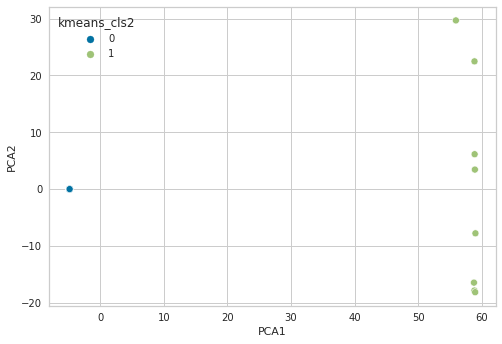

In [139]:
import seaborn as sns
sns.scatterplot(data=test,x='PCA1',y='PCA2',hue='kmeans_cls2')